<h1> Estadística descriptiva II: Variables bidimensionales </h1>

<h2> Introducción</h2>
Supongamos que tenemos una población de la que hemos tomado observaciones sobre dos variables distintas $X$ e $Y$. Por ejemplo, podemos medir la altura y el peso de los distintos alumnos de una clase. 

Nos interesa averiguar de qué forma podemos representar estas observaciones - tal como se hizo en el caso de una única variable- para obtener conclusiones sobre la naturaleza de las mismas.

<strong>Objetivos:</strong>

* Tabular los datos (i.e. introducirlos en una tabla).
* Definir , Representar, y estudiar las propiedades de las Distribuciones de frecuencias.
* Definir y calcular la Covarianza y la Correlación entre ambas variables.
* Estudiar la Regresión lineal.

In [39]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

<h2> Tabular datos bivariados</h2>

Lo primero que vamos a hacer es tabular los datos. 


Si:
* X toma r valores diferentes: $x_1, x_2, \cdots , x_r$    
* Y toma s valores diferentes: $y_1, y_2, \cdots , y_s$ 
entonces,la distribución conjunta de $(X,Y)$ es una tabla de frecuencias de doble entrada, tamaño $r \times s$. La tabla queda determinada por una matriz de valores $T=(n_{i,j})_{i=1,\cdots,r}^{j=1,\cdots,s}$. 

$$\begin{array}{lllllll} \  & y_1 & y_2 & \cdots & y_s \\
x_1 & n_{11} & n_{12} &\cdots &n_{1s} \\ 
x_2 & n_{21} & n_{22} &\cdots &n_{2s} \\
\vdots & \vdots & \vdots &\ddots & \vdots \\
x_r  & n_{r1} & n_{r2} &\cdots &n_{rs}
\end{array}$$

La entrada $n_{i,j}$ representa la frecuencia absoluta con la que se ha observado el par de valores $(x_i,y_j)$. El tamaño de la muestra (o de la población, en su caso), es $$n=\sum_{i=1}^r\sum_{j=1}^sn_{i,j}.$$ Las frecuencias relativas $$f_{i,j}=\frac{n_{i,j}}{n}$$ dan otra matriz de contingencia, $T=(f_{i,j})_{i=1,\cdots,r}^{j=1,\cdots,s}$. 



A menudo la tabla de contingencias se completa sumando las filas y las columnas de forma adecuada (lo que se suele llamar ampliar márgenes), lo cual incluye las <strong>distribuciones marginales</strong> de X e Y:


$$\begin{array}{cccccc} \  & y_1 & y_2 & \cdots & y_s & \text{Dist. Marginal de X}\\
x_1 & n_{11} & n_{12} &\cdots &n_{1s} & n_{1\cdot}\\ 
x_2 & n_{21} & n_{22} &\cdots &n_{2s} & n_{2\cdot}\\
\vdots & \vdots & \vdots &\ddots & \vdots &\vdots \\
x_r  & n_{r1} & n_{r2} &\cdots & n_{rs} & n_{r\cdot}\\
\text{Dist. Marginal de Y} & n_{\cdot1} & n_{\cdot2} &\cdots & n_{\cdot s}& n
\end{array}$$

Aquí $$n_{i\cdot}=\sum_{j=1}^sn_{ij},\quad i=1,\cdots,r$$ y $$n_{\cdot j}=\sum_{i=1}^rn_{ij},\quad j=1,\cdots,s.$$ 

Si lo hacemos con las frecuencias relativas, obtenemos la siguiente tabla:

$$\begin{array}{cccccc} \  & y_1 & y_2 & \cdots & y_s & \text{Dist. Marginal de X}\\
x_1 & f_{11} & f_{12} &\cdots & f_{1s} & f_{1\cdot}\\ 
x_2 & f_{21} & f_{22} &\cdots &f_{2s} & f_{2\cdot}\\
\vdots & \vdots & \vdots &\ddots & \vdots &\vdots \\
x_r  & f_{r1} & f_{r2} &\cdots & f_{rs} & f_{r\cdot}\\
\text{Dist. Marginal de Y} & f_{\cdot1} & f_{\cdot2} &\cdots & f_{\cdot s}& 1
\end{array}$$

Otro aspecto interesante es el estudio de las <strong>distribuciones condicionadas</strong>. La distribución de la variable $X$ condicionada a que la variable $Y$ toma un valor concreto, pongamos que  $Y=y_j$, queda determinada por las frecuencias $$f_{i_{|j}}=\frac{n_{ij}}{n_{\cdot j}}.$$ Análogamente, la distribución de la variable $Y$ condicionada a que la variable $X$ toma un valor concreto $X=x_i$ queda determinada por las frecuencias $$f_{_{|i}j}=\frac{n_{ij}}{n_{i \cdot}}.$$  

<h3> Un ejemplo sencillo: los fallecidos en el Titanic</h3>
    Vamos a crear una base de datos que contabiliza los fallecidos en el accidente del Titanic en función del tipo de pasaje. 

Concretamente, vamos a generar los datos que deberían dar lugar a la siguiente tabla de contingencia (y luego vamos a calcular la tabla a partir de los datos):

$$\begin{array}{lllllll} \  & \text{Superviviente} & \text{ Fallecido} \\
\text{ Primera Clase} & 203 & 122 \\ 
\text{ Segunda Clase} & 118 & 167 \\
\text{ Tercera Clase} & 178 & 528 \\
\text{ Tripulación} & 212 & 673
\end{array}$$
    
Para ello, generamos primero los datos: 

Hay que tener en cuenta que debemos generar las observaciones de forma coherente. Si generamos una lista de supervivientes/fallecidos, esta debe ser tal que al fijarnos en los pasajeros de primera clase, encontremos que hay exactamente 203 supervivientes y 122 fallecidos, y lo mismo con el resto de clases. Así pues, generamos una lista ordenada que contenga los distintos tipos de pasajeros de tal modo que aparezcan primero 203 y luego 122 de primera clase, luego 118 y 167 de segunda clase, etc. Así luego podremos crear una lista paralela que contenga el desenlace de cada pasajero de forma coherente (donde pusimos 203 pasajeros de primera clase, colocaremos también 203 supervivientes, etc). Esto se hace así:

In [40]:
Pasaje=["Primera Clase"]*203+["Primera Clase"]*122+["Segunda Clase"]*118+["Segunda Clase"]*167+["Tercera Clase"]*178+["Tercera Clase"]*528+["Tripulación"]*212+["Tripulación"]*673
Desenlace=["Superviviente"]*203+["Fallecido"]*122+["Superviviente"]*118+["Fallecido"]*167+["Superviviente"]*178+["Fallecido"]*528+["Superviviente"]*212+["Fallecido"]*673
df =pd.DataFrame({'Pasaje':Pasaje,'Desenlace': Desenlace})
df

,Pasaje,Desenlace
0,Primera Clase,Superviviente
1,Primera Clase,Superviviente
2,Primera Clase,Superviviente
3,Primera Clase,Superviviente
4,Primera Clase,Superviviente
...,...,...
2196,Tripulación,Fallecido
2197,Tripulación,Fallecido
2198,Tripulación,Fallecido
2199,Tripulación,Fallecido


Ahora generamos la tabla de contingencia asociada. Primero con las frecuencias absolutas:

In [41]:
pd.crosstab(df['Pasaje'],df['Desenlace'], margins_name='Total',margins=True)

Desenlace,Fallecido,Superviviente,Total
Pasaje,,,
Primera Clase,122,203,325
Segunda Clase,167,118,285
Tercera Clase,528,178,706
Tripulación,673,212,885
Total,1490,711,2201


A continuación, con las frecuencias relativas: 

In [42]:
TC=pd.crosstab(df['Pasaje'],df['Desenlace'], margins_name='Total',margins=True,normalize=True)
TC

Desenlace,Fallecido,Superviviente,Total
Pasaje,,,
Primera Clase,0.055429,0.092231,0.147660
Segunda Clase,0.075875,0.053612,0.129487
Tercera Clase,0.239891,0.080872,0.320763
Tripulación,0.305770,0.096320,0.402090
Total,0.676965,0.323035,1.000000


Si queremos fijarnos en las distribuciones condicionadas columna a columna (es decir, queremos averiguar cómo se distribuyen los fallecidos entre los distintos tipos de pasaje, y lo mismo con los supervivientes o, lo que es lo mismo, la distribución de la variable Pasaje condicionada a un valor concreto de la variable Desenlace), procedemos como sigue:

In [43]:
TCM1=pd.crosstab(df['Pasaje'],df['Desenlace'],normalize='columns')
TCM1

Desenlace,Fallecido,Superviviente
Pasaje,,
Primera Clase,0.081879,0.285513
Segunda Clase,0.112081,0.165963
Tercera Clase,0.354362,0.250352
Tripulación,0.451678,0.298172


Ahora podemos fijarnos en las distribuciones condicionadas fila a fila (es decir, queremos averiguar cómo se distribuye cada clase de pasaje entre fallecidos y supervivientes, o, lo que es lo mismo, la distribución de la variable Desenlace condicionada a un valor concreto de la variable Pasaje). Procedemos como sigue:

In [44]:
TCM2=pd.crosstab(df['Pasaje'],df['Desenlace'], margins_name='Total',normalize='index')
TCM2

Desenlace,Fallecido,Superviviente
Pasaje,,
Primera Clase,0.375385,0.624615
Segunda Clase,0.585965,0.414035
Tercera Clase,0.747875,0.252125
Tripulación,0.760452,0.239548


También podemos dibujar la información de la tabla de contingencia utilizando diagramas de barras. Primero lo hacemos con diagramas de barras apilados (i.e. stacked=True):

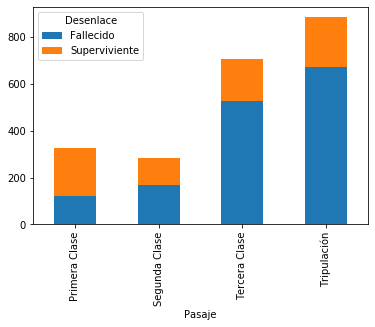

In [45]:
# Apilados, con las frecuencias absolutas:
TC=pd.crosstab(df['Pasaje'],df['Desenlace'])
TC.plot.bar(stacked=True)
plt.show()

Y ahora lo hacemos con diagramas de barras agrupados (stacked=False):

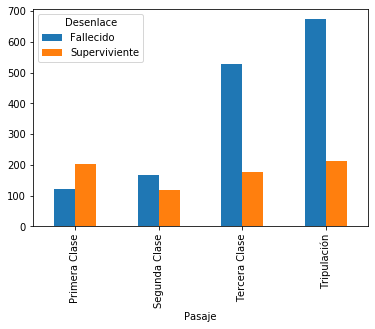

In [46]:
# Agrupados, con las frecuencias absolutas:
TC=pd.crosstab(df['Pasaje'],df['Desenlace'])
TC.plot.bar(stacked=False)
plt.show()

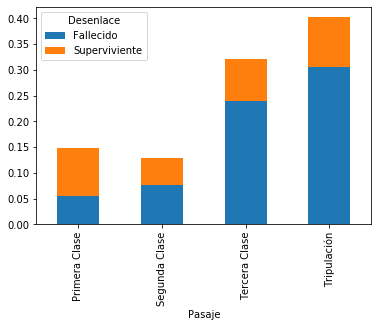

In [47]:
# Apilados, con las frecuencias relativas:
TCnorm=pd.crosstab(df['Pasaje'],df['Desenlace'], normalize=True)
TCnorm.plot.bar(stacked=True)
plt.show()

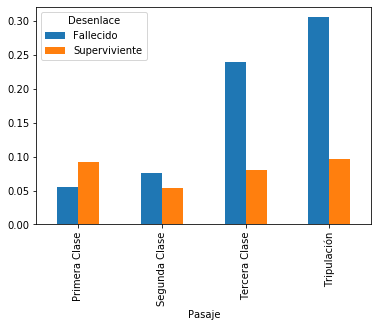

In [48]:
# Agrupados, con las frecuencias relativas:
TCnorm=pd.crosstab(df['Pasaje'],df['Desenlace'], normalize=True)
TCnorm.plot.bar(stacked=False)
plt.show()

Lo mismo podemos hacer con las variables cambiadas:

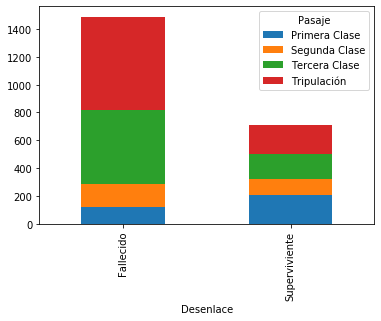

In [49]:
# Apilados, con las frecuencias absolutas:
TC=pd.crosstab(df['Desenlace'],df['Pasaje'])
TC.plot.bar(stacked=True)
plt.show()

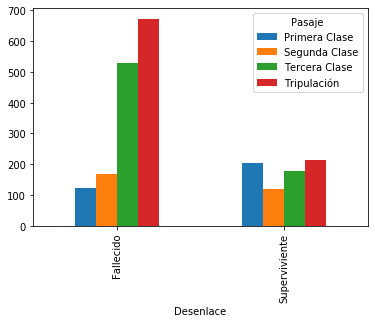

In [50]:
# Agrupados, con las frecuencias absolutas:
TC=pd.crosstab(df['Desenlace'],df['Pasaje'])
TC.plot.bar(stacked=False)
plt.show()

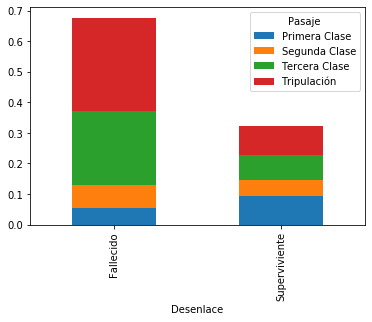

In [51]:
# Apilados, con las frecuencias relativas:
TCnorm=pd.crosstab(df['Desenlace'], df['Pasaje'],normalize=True)
TCnorm.plot.bar(stacked=True)
plt.show()

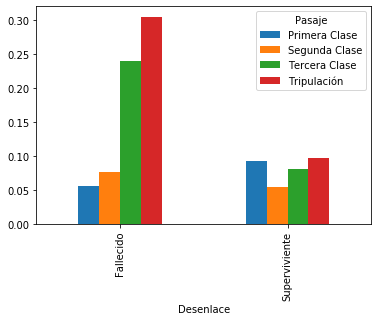

In [52]:
# Agrupados, con las frecuencias relativas:
TCnorm=pd.crosstab(df['Desenlace'], df['Pasaje'],normalize=True)
TCnorm.plot.bar(stacked=False)
plt.show()

Y también podemos visualizar las distribuciones condicionadas:

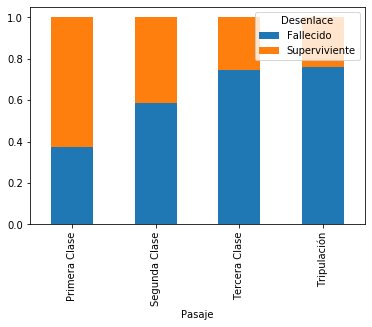

In [53]:
# Apilados, con las distribuciones condicionadas Desenlace|Pasaje:
TCnorm=pd.crosstab(df['Pasaje'],df['Desenlace'], normalize='index')
TCnorm.plot.bar(stacked=True)
plt.show()

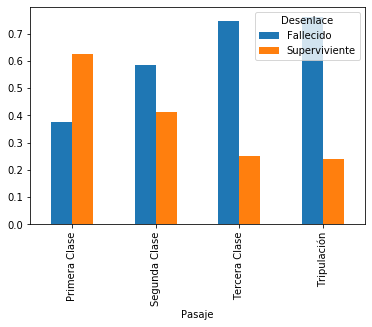

In [54]:
# Agrupados, con las distribuciones condicionadas Desenlace|Pasaje:
TCnorm=pd.crosstab(df['Pasaje'],df['Desenlace'], normalize='index')
TCnorm.plot.bar(stacked=False)
plt.show()

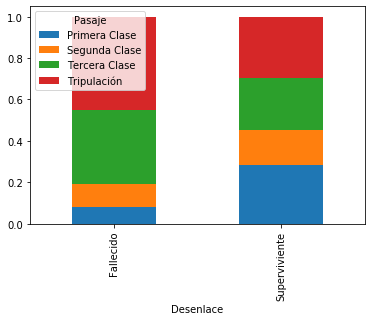

In [55]:
# Apilados, con las distribuciones condicionadas Pasaje|Desenlace:
TCnorm=pd.crosstab(df['Desenlace'],df['Pasaje'], normalize='index')
TCnorm.plot.bar(stacked=True)
plt.show()

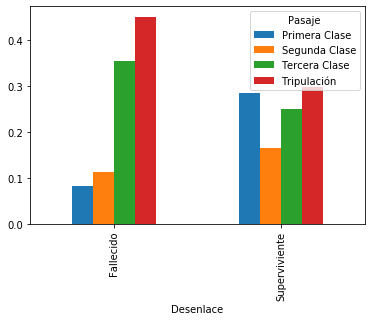

In [56]:
# Agrupados, con las distribuciones condicionadas Pasaje|Desenlace:
TCnorm=pd.crosstab(df['Desenlace'],df['Pasaje'], normalize='index')
TCnorm.plot.bar(stacked=False)
plt.show()

<h2> Otro ejemplo detallado </h2>

Hay varios algoritmos que permiten ordenar una lista. En el fichero <strong>tiempos.csv</strong> se encuentran
datos sobre el tiempo que han tardado tres algoritmos en ordenar diferentes listas de números.
Para cada experimento se ha almacenado el algoritmo usado (entre 0 y 2), el máximo número de
veces que se ha repetido algún elemento de la lista, la longitud de la lista y el tiempo necesitado
para ordenarla. Vamos a:

* Crear una nueva variable llamada “Categoria” que parta los tiempos en tres categorías: “Rapido”,“Normal” y “Lento”. En la categoría ''Rapido'' se deben incluir el $25\%$ de los tiempos más rápidos, en “Lento” el $25\%$ de los tiempos más lentos y en “Normal” las demás.
* Añadir esta variable al data frame.
* Construir las tablas de contingencia (también se llaman tablas cruzadas) de “Categoria” respecto a “Algoritmo” para las frecuencias conjuntas absolutas y relativas, así como las tablas de contingencia marginales.

<h2>Solución</h2>
Comenzamos cargando los paquetes que podriamos necesitar. A continuación, leemos el fichero que nos dan y mostramos el data frame:

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns

tiempos=pd.read_csv('tiempos.csv')
tiempos

,Algoritmo,Max_repeticiones,Longitud,Tiempo
0,1,5,1022,0.003272
1,0,5,1529,0.161851
2,2,6,1495,0.069382
3,1,5,1059,0.003492
4,0,4,1153,0.088125
...,...,...,...,...
994,0,5,1422,0.136528
995,2,4,1091,0.035407
996,0,7,1800,0.220347
997,1,6,1030,0.003468


Para poder clasificar los algoritmos por categorías, como "Lento", "Rápido" y "Normal", debemos antes fijarnos en los tiempos y obtener los cuartiles: 

In [58]:
Tiempo=tiempos["Tiempo"]
Q1=np.quantile(Tiempo,0.25)
Q2=np.quantile(Tiempo,0.5)
Q3=np.quantile(Tiempo,0.75)
m=min(Tiempo)
M=max(Tiempo)
print([m,Q1,Q2,Q3,M])

[0.003205060958862305, 0.005486726760864258, 0.0589139461517334, 0.09624671936035156, 0.2218468189239502]


Ahora podemos cortar (o agrupar, o clasificar) los datos en términos de que el tiempo de ejecución sea inferior a Q1, esté entre Q1 y Q3, o sea superior a Q3. Esto nor permite crear una nueva variable, que llamamos Categoría, y que añadimos al data frame:

In [59]:
Categoria=pd.cut(
    Tiempo,
    bins = [m,Q1,Q3,M],
    labels=["Rápido", "Normal", "Lento"],
)

In [60]:
tiempos['Categoria']=Categoria
tiempos

,Algoritmo,Max_repeticiones,Longitud,Tiempo,Categoria
0,1,5,1022,0.003272,Rápido
1,0,5,1529,0.161851,Lento
2,2,6,1495,0.069382,Normal
3,1,5,1059,0.003492,Rápido
4,0,4,1153,0.088125,Normal
...,...,...,...,...,...
994,0,5,1422,0.136528,Lento
995,2,4,1091,0.035407,Normal
996,0,7,1800,0.220347,Lento
997,1,6,1030,0.003468,Rápido


Ahora podemos construir la tabla de contingencia (también llamada tabla cruzada) de Algoritmos frente a Categoría:

In [61]:
Algoritmos=tiempos['Algoritmo']
Categorias=tiempos['Categoria']
pd.crosstab(Algoritmos, Categorias,margins=True)

Categoria,Rápido,Normal,Lento,All
Algoritmo,,,,
0,0,83,241,324
1,249,85,0,334
2,0,331,9,340
All,249,499,250,998


Esta tabla está construida con las frecuencias absolutas. Si queremos obtener las frecuencias relativas (respecto del total de observaciones), podemos hacerlo con la orden normalize:

In [62]:
pd.crosstab(Algoritmos, Categorias,margins=True,normalize=True)

Categoria,Rápido,Normal,Lento,All
Algoritmo,,,,
0,0.000000,0.083166,0.241483,0.324649
1,0.249499,0.085170,0.000000,0.334669
2,0.000000,0.331663,0.009018,0.340681
All,0.249499,0.500000,0.250501,1.000000


Ahora bien, si lo que queremos es conocer las frecuencias relativas marginales por filas (es decir, las calculamos de forma separada en cada una de las filas del data frame, lo que en nuestro ejemplo significa que calculamos para cada algoritmo, con qué frecuencia éste ha sido clasificado como Rápido, Normal o Lento), lo hacemos normalizando respecto de index:

In [63]:
pd.crosstab(Algoritmos, Categorias,normalize='index')

Categoria,Rápido,Normal,Lento
Algoritmo,,,
0,0.000000,0.256173,0.743827
1,0.745509,0.254491,0.000000
2,0.000000,0.973529,0.026471


Finalmente, si lo que queremos es conocer las frecuencias relativas marginales por columnas (es decir, las calculamos de forma separada en cada una de las columnas del data frame, lo que en nuestro ejemplo significa que calculamos para cada categoría, con qué frecuencia ésta ha sido obtenida por cada uno de los algoritmos: 0,1 y 2), lo hacemos normalizando respecto de columns:

In [64]:
pd.crosstab(Algoritmos, Categorias,normalize='columns')

Categoria,Rápido,Normal,Lento
Algoritmo,,,
0,0.0,0.166333,0.964
1,1.0,0.170341,0.000
2,0.0,0.663327,0.036


La tabla de contingencia puede ser representada gráficamente usando un diagrama de barras apiladas:

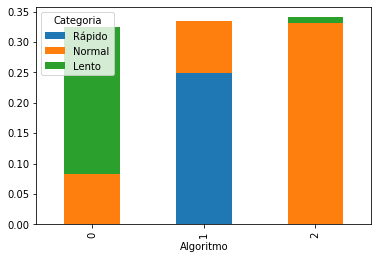

In [65]:
TC=pd.crosstab(Algoritmos, Categorias,normalize=True)
TC.plot.bar(stacked=True)
plt.show()

Pero también puede hacerse con un diagrama de barras agrupadas:

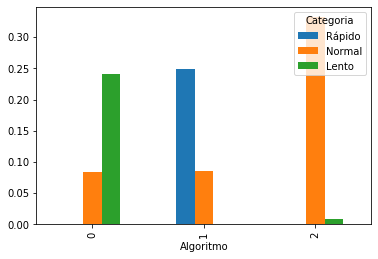

In [66]:
TC=pd.crosstab(Algoritmos, Categorias,normalize=True)
TC.plot.bar(stacked=False)
plt.show()

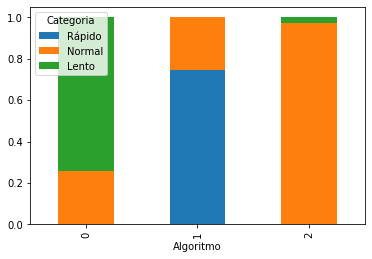

In [67]:
# Apilados, con las distribuciones condicionadas Categoría|Algoritmo:
TCnorm=pd.crosstab(Algoritmos,Categorias, normalize='index')
TCnorm.plot.bar(stacked=True)
plt.show()

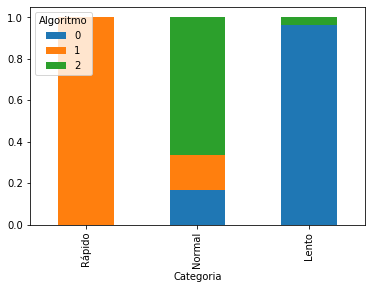

In [68]:
# Apilados, con las distribuciones condicionadas Algoritmo|Categoría:
TCnorm=pd.crosstab(Categorias,Algoritmos, normalize='index')
TCnorm.plot.bar(stacked=True)
plt.show()

<h2> Covarianza, correlación, y regresión lineal</h2>

Supongamos que tenemos dos variables cuantitativas X e Y de las que hemos realizado $n$ observaciones (i.e. tenemos una muestra de tamaño $n$ de la variable bidimensional $(X,Y)$: $$\{(x_1,y_1),(x_2,y_2),\cdots, (x_n,y_n)\}$$
donde los valores pueden aparecer de forma repetida. La forma habitual de representar este conjunto de observaciones es dibujando la nube de puntos asociada.


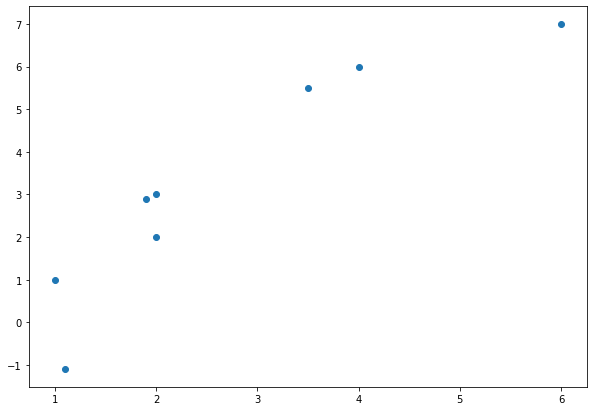

In [69]:
import numpy as np
import matplotlib.pyplot as plt
n = 5000
x = [1,1.1,2,1.9,3.5,4,6,2]
y = [1,-1.1,3,2.9,5.5,6,7,2]
plt.figure(figsize=(10,7))
plt.scatter(x, y) # Un gráfico similar se obtiene con: plt.plot(x,y,'o',markersize=4)
plt.show()

Dadas las variables estadísticas $X,Y$ de las que tenemos $n$ observaciones $\mathcal{X}=(x_1,\cdots,x_n)$ e $\mathcal{Y}=(y_1,\cdots,y_n)$, consideremos los vectores $\overline{\mathcal{X}}=(\overline{X},\cdots,\overline{X})$ e $\overline{\mathcal{Y}}=(\overline{Y},\cdots,\overline{Y})$. El <strong>coeficiente de correlación de Pearson</strong> $r_{X,Y}$ viene dado por la expresión:
$$r_{X,Y}=\frac{\langle \mathcal{X}-\overline{\mathcal{X}},\mathcal{Y}-\overline{\mathcal{Y}}\rangle}{\|\mathcal{X}-\overline{\mathcal{X}}\|\|\mathcal{Y}-\overline{\mathcal{Y}}\|}=\frac{\sum_{i=1}^n(x_i-\overline{X})(y_i-\overline{Y})}{\sqrt{\sum_{i=1}^n(x_i-\overline{X})^2}\sqrt{\sum_{i=1}^n(y_i-\overline{Y})^2}}$$

Es evidente (consecuencia directa de la desigualdad de Cauchy-Schwarz) que $-1\leq r_{X,Y}\leq 1$. Cuando $r_{X,Y}=0$ las variables se dicen incorreladas (o no correlacionadas). Cuando $r_{X,Y}=1$ la correlación es óptima. Por ejemplo, siempre se tiene que $r_{X,X}=1$. 

Si llamamos <strong>covarianza</strong> $s_{X,Y}$ al valor 
$$s_{X,Y}=\frac{1}{n-1}\sum_{i=1}^n(x_i-\overline{X})(y_i-\overline{Y})=s_{Y,X}$$
es claro que 
$$r_{X,Y}=\frac{s_{X,Y}}{s_Xs_Y}=r_{Y,X},$$
donde $s_X^2:=s_{X,X}$ y $s_Y^2:=s_{Y,Y}$.  La matrix 
$$cov_{X,Y}=\left[\begin{array}{ccc} s_X^2 & s_{X,Y} \\ s_{X,Y} & s_Y^2\end{array}\right]$$
recibe el nombre de <strong>matrix de covarianzas</strong> de las variables $X,Y$. 
Análogamente, podemos calcular la matriz de correlaciones: 
$$corr_{X,Y}=\left[\begin{array}{ccc} r_{X,X} & r_{X,Y} \\ r_{X,Y} & r_{Y,Y}\end{array}\right]=\left[\begin{array}{ccc} 1 & r_{X,Y} \\ r_{X,Y} & 1\end{array}\right]$$

Nota: A menudo usamos $r$ para denotar $r_{X,Y}$, cuando no hay posibilidad de confusión con las variables $X,Y$. 

<h3>Regresión lineal</h3>

Dadas $n$ observaciones $\mathcal{X}=(x_1,\cdots,x_n)$ e $\mathcal{Y}=(y_1,\cdots,y_n)$, nos interesa calcular la recta $y=ax+b$ que mejor aproxime los datos. En otras palabras, buscamos los valores $a,b$ que minimizan la cantidad $$E(a,b)=\|(ax_1+b-y_1,\cdots,ax_n+b-y_n)\|^2=\sum_{i=1}^n(ax_i+b-y_i)^2.$$

Hay dos modos de abordar este problema: O bien consideramos que estamos ante un problema de optimización de una función de dos variables (en cuyo caso debemos calcular la solución de $\frac{\partial E}{\partial a}=\frac{\partial E}{\partial b}=0$) o bien consideramos que estamos ante un problema geométrico y calculamos la proyección ortogonal del vector $\mathcal{Y}=(y_1,\cdots,y_n)$ sobre el espacio $V=\mathbf{span}\{(x_1,\cdots,x_n),(1,\cdots,1)\}$. 

En ambos casos llegamos a la misma solución: 
$$a=\frac{s_{X,Y}}{s_X^2};\quad b=\overline{Y}-a\overline{X}$$ 
y la recta $y=ax+b$ se llama recta de regresión de la nube de puntos $\{(x_i,y_i)\}_{i=1}^n$.  


<h4>Bondad de ajuste de la recta de regresión</h4>

Supongamos que $Y'=aX+b$ es la recta de regresión. Entonces podemos estimar los  errores $e_i=y_i-(ax_i+b)$, $i=1,\cdots, n$ (que se llaman residuos). Llamamos <strong> variable residual </strong> $Y'$ a la que toma los valores $y_i'=ax_i+b$, $i=1,\cdots,n$, y llamamos variable residual $e$ a la que toma los valores $e_i$, $i=1,\cdots,n$. De modo que $Y=Y'+e$, y nos interesa estimar $$\|\mathcal{Y}-\mathcal{Y'}\|=\|(e_1,\cdots,e_n)\|=\left(\sum_{i=1}^ne_i^2 \right)^{\frac{1}{2}}.$$

Es fácil comprobar que $$e_i=y_i-ax_i-b=(y_i-\overline{Y})-a(x_i-\overline{X}),\quad i=1,\cdots,n$$
y por tanto
$$\overline{e}= \frac{1}{n}\sum_{i=1}^ne_i= \frac{1}{n}\sum_{i=1}^n (y_i-\overline{Y})-a(x_i-\overline{X})=0$$
Se sigue que $s_e^2= \frac{1}{n-1}\sum_{i=1}^ne_i^2$. Ahora, un sencillo cálculo nos da la identidad
$$s_e^2= s_Y^2(1-r_{X,Y}^2)$$
Es por ello que $R^2=r_{X,Y}^2$ recibe el nombre de coeficiente de determinación. Si su valor supera $0.9$, decimos que el ajuste de la recta de regresión es muy bueno, si supera $0.8$, decimos que es bueno. En el resto de casos, no es bueno. 



<h3>Un primer ejemplo</h3> 
Veamos cómo se calcula la recta de regresión en un ejemplo sencillo.

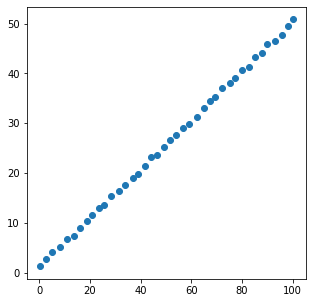

a =  0.4908675613191466
b =  1.2121132214358799
The best fit simple linear regression line is 0.49x + 1.21.
La recta de regresión es 0.4908675613191466 x +  1.2121132214358799


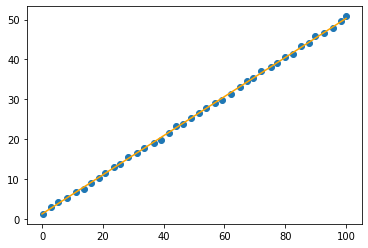

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym # Esto permite cálculo simbólico (quizás no lo usemos)

np.random.seed(777)  # para fijar números aleatorios
x = [xi + np.random.rand() for xi in np.linspace(0, 100, 40)]
y = [yi + np.random.rand() for yi in np.linspace(1, 50, 40)]

plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.show()

a, b = np.polyfit(x,y,1) 
print('a = ', a)
print('b = ', b)
print ('The best fit simple linear regression line is {:.2f}x + {:.2f}.'.format(a,b))
print ('La recta de regresión es',a, 'x + ',b)

# grafica


z=np.linspace(0, 100, 400)
f=a*z+b
plt.plot(x,y,'o',label='(xi,yi)')
plt.plot(z,f, color='orange',  label=f)
plt.show()

In [71]:
df =pd.DataFrame({'X':x,'Y': y})
df
corr_matrix = df.corr(method='pearson')
corr_matrix
r=corr_matrix["X"][1]
R2=r*r
print("El coef. de correlación de Pearson es = ",r)
print("El coef. de determinación es = ",R2)

El coef. de correlación de Pearson es =  0.99979848082162
El coef. de determinación es =  0.9995970022532193


Veamos otro ejemplo, tomando los datos de un fichero que está en una página web:

Primero descargamos los datos:

In [101]:
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/' +
       'Estadistica-machine-learning-python/master/data/Cars93.csv')
datos = pd.read_csv(url)
datos

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,Front,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,Front,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,Front,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


Queremos analizar la relación que hay entre las variables Peso (W) y Precio (P). Pensamos que debe haber una relación del tipo $$ P\approx a \log W+b$$ y por tanto vamos a buscar la recta de regresión entre las variables $X=\log W$ e $Y=P$. 

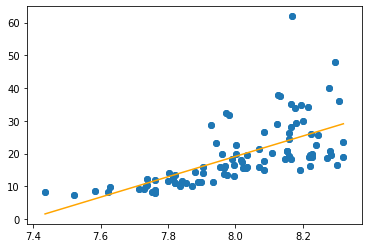

a =  31.088228702541702
b =  -229.53807094258343
La recta de regresión es 31.088228702541702 x +  -229.53807094258343


In [149]:
datos['log_Weight'] = np.log(datos['Weight'])
x=datos['log_Weight']
y=datos['Price']
z=np.linspace(min(x), max(x), 4000)
a, b = np.polyfit(x,y,1)
f=a*z+b

plt.scatter(x, y)
plt.plot(x,y,'o',label='(xi,yi)')
plt.plot(z,f, color='orange',  label=f)
plt.show()

print('a = ', a)
print('b = ', b)
print ('La recta de regresión es',a, 'x + ',b)

In [157]:
df =pd.DataFrame({'log(Weight)':x,'Price': y})
corr_matrix = df.corr()
corr_matrix

,log(Weight),Price
log(Weight),1.00000,0.64862
Price,0.64862,1.00000


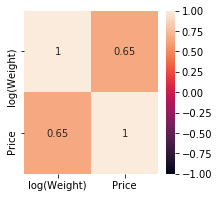

In [164]:
# Mapa de calor (Heatmap) de la matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))

sns.heatmap(
    corr_matrix,
    annot     = True,
    vmin      = -1,
    vmax      = 1
)

ax.set_xticklabels(
    ax.get_xticklabels()
)

ax.tick_params(labelsize = 10)

In [159]:
r=corr_matrix["log(Weight)"][1]
R2=r*r
print("El coef. de correlación de Pearson es = ",r)
print("El coef. de determinación es = ",R2)

El coef. de correlación de Pearson es =  0.648620411857384
El coef. de determinación es =  0.42070843867804236


Evidentemente, la bondad de ajuste de la recta de regresión es en este caso pésima. 

También se puede calcular directamente la matrix de covarianzas
$$cov_{X,Y}=\left[\begin{array}{ccc} s_X^2 & s_{X,Y} \\ s_{X,Y} & s_Y^2\end{array}\right]$$

In [160]:
covariance_matrix =  df.cov()
covariance_matrix

,log(Weight),Price
log(Weight),0.040616,1.262665
Price,1.262665,93.304579


<h2> Un ejemplo hecho ''a mano''</h2>

 f =  0.839285714285714*x + 0.0714285714285712
coef_correlación   r  =  0.9318356132188194
coef_determinación r2 =  0.8683176100628931
86.83% de los datos
     está descrito en el modelo lineal


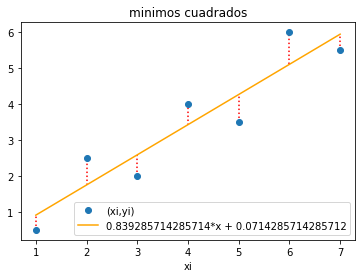

In [76]:
# mínimos cuadrados, regresión con polinomio grado 1
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# INGRESO
xi = [1,   2,   3,  4,  5,   6, 7]
yi = [0.5, 2.5, 2., 4., 3.5, 6, 5.5]

# PROCEDIMIENTO
xi = np.array(xi,dtype=float)
yi = np.array(yi,dtype=float)
n  = len(xi)

# sumatorias y medias
xm  = np.mean(xi)
ym  = np.mean(yi)
sx  = np.sum(xi)
sy  = np.sum(yi)
sxy = np.sum(xi*yi)
sx2 = np.sum(xi**2)
sy2 = np.sum(yi**2)

# coeficientes a0 y a1
a1 = (n*sxy-sx*sy)/(n*sx2-sx**2)
a0 = ym - a1*xm

# polinomio grado 1
x = sym.Symbol('x')
f = a0 + a1*x

fx = sym.lambdify(x,f)
fi = fx(xi)

# coeficiente de correlación
numerador = n*sxy - sx*sy
raiz1 = np.sqrt(n*sx2-sx**2)
raiz2 = np.sqrt(n*sy2-sy**2)
r = numerador/(raiz1*raiz2)

# coeficiente de determinacion
r2 = r**2
r2_porcentaje = np.around(r2*100,2)

# SALIDA
# print('ymedia =',ym)
print(' f = ',f)
print('coef_correlación   r  = ', r)
print('coef_determinación r2 = ', r2)
print(str(r2_porcentaje)+'% de los datos')
print('     está descrito en el modelo lineal')

# grafica
plt.plot(xi,yi,'o',label='(xi,yi)')
# plt.stem(xi,yi,bottom=ym,linefmt ='--')
plt.plot(xi,fi, color='orange',  label=f)

# lineas de error
for i in range(0,n,1):
    y0 = np.min([yi[i],fi[i]])
    y1 = np.max([yi[i],fi[i]])
    plt.vlines(xi[i],y0,y1, color='red',
               linestyle ='dotted')
plt.legend()
plt.xlabel('xi')
plt.title('minimos cuadrados')
plt.show()

<h2> Matriz de correlaciones </h2>

A menudo, disponemos de varias variables estadísticas que queremos estudiar de forma simultánea. En estos casos suele ser interesante (para las variables cuantitativas), conocer las distintas correlaciones que existen. Todas ellas quedan recogidas en una única matriz, llamada  <strong> matrix de correlaciones</strong>. Vamos a calcularla en un ejemplo concreto. También vamos a representarla gráficamente con un mapa de calor (un mapa de colores que representan lo fuerte o débil que es la correlación entre cada par de variables).

In [165]:
# Datos
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/' +
       'Estadistica-machine-learning-python/master/data/SaratogaHouses.csv')
datos = pd.read_csv(url, sep=",")

datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   int64  
 7   fireplaces       1728 non-null   int64  
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
dtypes: float64(2), int64(8), object(6)
memory usage: 216.1+ KB


In [166]:
# Se renombran las columnas para que sean más descriptivas
datos.columns = ["precio", "metros_totales", "antiguedad", "precio_terreno",
                 "metros_habitables", "universitarios", "dormitorios", 
                 "chimenea", "banyos", "habitaciones", "calefaccion",
                 "consumo_calefacion", "desague", "vistas_lago",
                 "nueva_construccion", "aire_acondicionado"]
       
# Nos quedamos solo con las variables cuantitativas
datos = datos.select_dtypes(include=['float64', 'int'])

In [79]:
datos

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones
0,132500,0.09,42,50000,906,35,2,1,1.0,5
1,181115,0.92,0,22300,1953,51,3,0,2.5,6
2,109000,0.19,133,7300,1944,51,4,1,1.0,8
3,155000,0.41,13,18700,1944,51,3,1,1.5,5
4,86060,0.11,0,15000,840,51,2,0,1.0,3
...,...,...,...,...,...,...,...,...,...,...
1723,289000,0.38,32,24200,2310,61,5,1,2.5,11
1724,285000,0.94,37,36200,2564,61,4,1,2.5,11
1725,194900,0.39,9,20400,1099,51,2,0,1.0,3
1726,125000,0.24,48,16800,1225,51,3,1,1.0,7


In [167]:
# Matriz de correlación
# ==============================================================================
corr_matrix = datos.corr(method='pearson')
corr_matrix

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones
precio,1.000000,0.158333,-0.188793,0.581266,0.712390,0.200119,0.400349,0.376786,0.597250,0.531170
metros_totales,0.158333,1.000000,-0.016352,0.059222,0.163450,-0.033148,0.113982,0.085226,0.084823,0.137604
antiguedad,-0.188793,-0.016352,1.000000,-0.021818,-0.174242,-0.037785,0.027125,-0.172022,-0.361897,-0.082264
precio_terreno,0.581266,0.059222,-0.021818,1.000000,0.423441,0.228427,0.202449,0.211727,0.297498,0.298865
metros_habitables,0.712390,0.163450,-0.174242,0.423441,1.000000,0.209981,0.656196,0.473788,0.718564,0.733666
universitarios,0.200119,-0.033148,-0.037785,0.228427,0.209981,1.000000,0.162919,0.246626,0.179541,0.157068
dormitorios,0.400349,0.113982,0.027125,0.202449,0.656196,0.162919,1.000000,0.284475,0.458033,0.671863
chimenea,0.376786,0.085226,-0.172022,0.211727,0.473788,0.246626,0.284475,1.000000,0.436234,0.319894
banyos,0.597250,0.084823,-0.361897,0.297498,0.718564,0.179541,0.458033,0.436234,1.000000,0.517585
habitaciones,0.531170,0.137604,-0.082264,0.298865,0.733666,0.157068,0.671863,0.319894,0.517585,1.000000


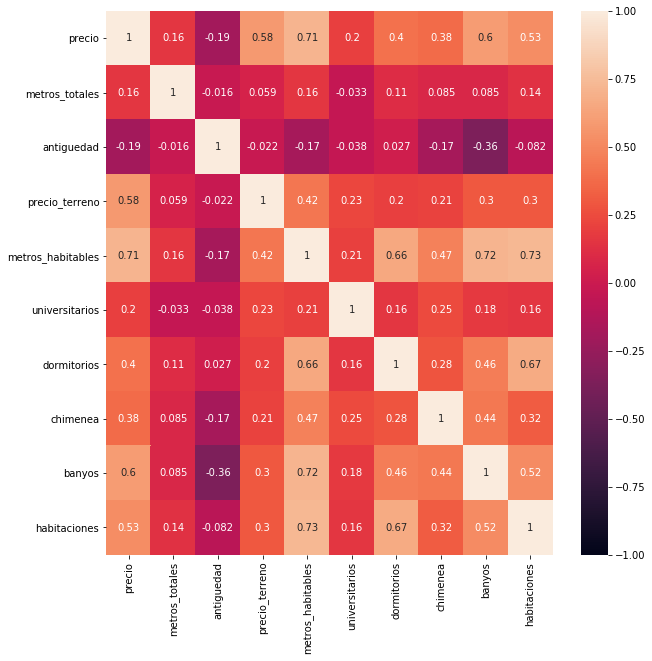

In [168]:
# Mapa de calor (Heatmap) de la matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    vmin      = -1,
    vmax      = 1
)

ax.set_xticklabels(
    ax.get_xticklabels()
)

ax.tick_params(labelsize = 10)

Seleccionamos ahora, a la vista de la matriz de correlaciones, dos variables que muestran cierta correlación y calculamos la correspondiente recta de regresión. En nuestro caso, vamos a estudiar las variables "metros_habitables" y "precio". (La correlación entre ambas es $0.72$).

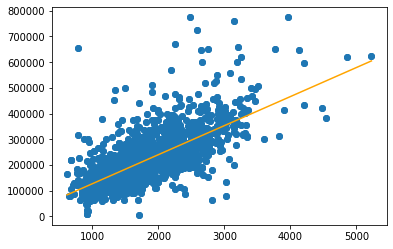

a =  113.12254184680948
b =  13439.394004889531
La recta de regresión es 113.12254184680948 x +  13439.394004889531


In [169]:
x=datos["metros_habitables"]
y=datos["precio"]
z=np.linspace(min(x), max(x), 4000)
a, b = np.polyfit(x,y,1)
f=a*z+b

plt.scatter(x, y)
plt.plot(x,y,'o',label='(xi,yi)')
plt.plot(z,f, color='orange',  label=f)
plt.show()

print('a = ', a)
print('b = ', b)
print ('La recta de regresión es',a, 'x + ',b)

In [170]:
r=corr_matrix["metros_habitables"][8]
R2=r*r
print("El coef. de correlación de Pearson es = ",r)
print("El coef. de determinación es = ",R2)

El coef. de correlación de Pearson es =  0.718563679038253
El coef. de determinación es =  0.5163337608329895


La bondad de ajuste no es buena.  